In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [141]:
df = pd.read_csv('../MyPython/dataset/Salary_Data.csv', sep=';')
print(df.shape)
df.head()

(30, 2)


,Años de experiencia,Salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [142]:
df.columns = ['AE', 'Salario']
df.head()

,AE,Salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [143]:
df.info() #mirar valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AE       30 non-null     float64
 1   Salario  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [144]:
df.isna().sum() #no hay valores nulos

AE         0
Salario    0
dtype: int64

Text(0.5, 1.0, 'Relación entre años de experiencia y salario')

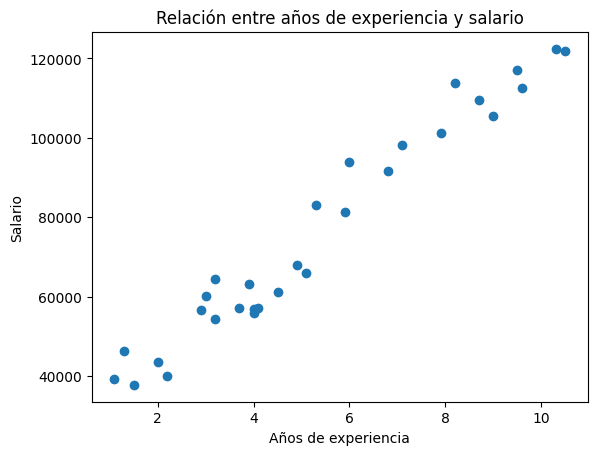

In [145]:
plt.scatter(x=df['AE'], y=df['Salario'])
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Relación entre años de experiencia y salario')

In [146]:
df.corr()

,AE,Salario
AE,1.000000,0.978242
Salario,0.978242,1.000000


<Axes: >

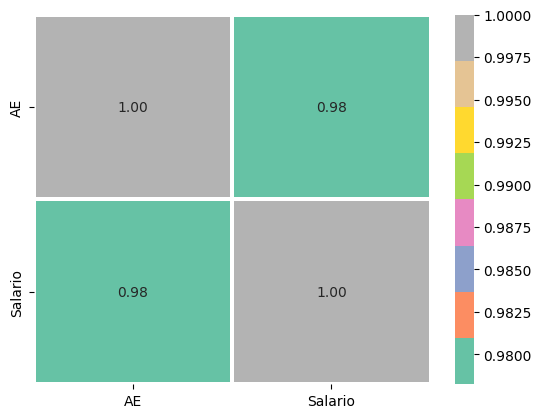

In [147]:
import seaborn as sns
sns.heatmap(df.corr(), 
annot=True, fmt='.2f', 
linewidths=1.5, 
cmap="Set2")

<Axes: xlabel='AE', ylabel='Salario'>

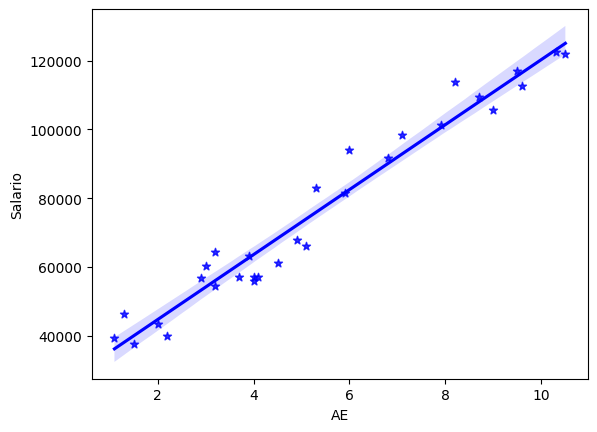

In [148]:
sns.regplot(x='AE', y='Salario', marker='*', color='blue', data=df)

In [149]:
x= df.drop(['Salario'], axis=1)
y= df[['Salario']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regresion = LinearRegression()
regresion.fit(x_train, y_train)
y_pred = regresion.predict(x_test)

print(regresion.intercept_)
print(regresion.coef_)
print(f"R2={regresion.score(x_test, y_test):.2%}")

[26780.09915063]
[[9312.57512673]]
R2=98.82%


In [150]:
data = pd.DataFrame()
data['AE'] = x_train
data['Salario'] = y_train

regre = smf.ols(formula='Salario ~ AE', data=data).fit()
print(regre.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           5.03e-15
Time:                        08:23:20   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.678e+04   2818.687      9.501      0.0

y = 2678 + 9312 * x

MSE: 12823412.30
RMSE: 3580.98


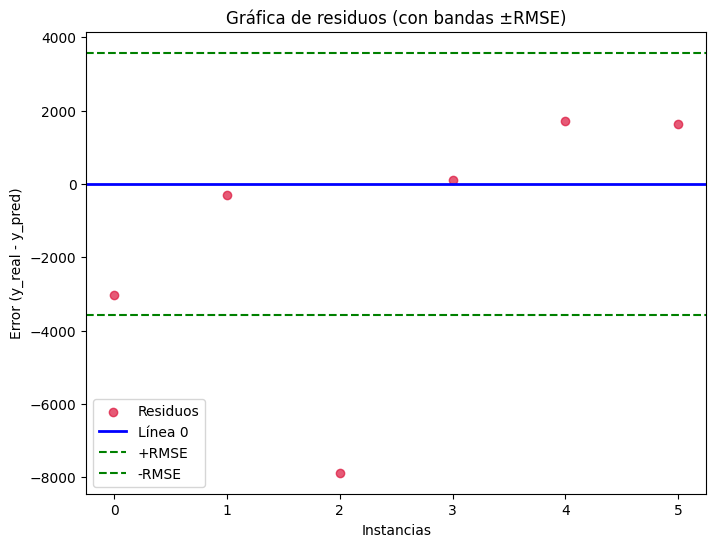

In [151]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Función para graficar los residuos
def grafica_error(y_real, y_pred):
    # Asegurar que son arrays planos
    y_real = np.array(y_real).ravel()
    y_pred = np.array(y_pred).ravel()
    
    # Calcular residuos
    residuos = y_real - y_pred
    
    # Calcular MSE y RMSE
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    # Graficar
    x1 = np.arange(len(y_pred))
    plt.figure(figsize=(8,6))
    plt.scatter(x1, residuos, color='crimson', alpha=0.7, label="Residuos")
    plt.axhline(0, color='blue', linestyle='-', linewidth=2, label="Línea 0")
    plt.axhline(rmse, color='green', linestyle='--', label="+RMSE")
    plt.axhline(-rmse, color='green', linestyle='--', label="-RMSE")
    
    plt.title('Gráfica de residuos (con bandas ±RMSE)')
    plt.xlabel('Instancias')
    plt.ylabel('Error (y_real - y_pred)')
    plt.legend()
    plt.show()

# Llamar a la función
grafica_error(y_test, y_pred)
